In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# To read directly the CSV from the John Hopkins github repo
import io
import requests

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3, rc={'lines.linewidth': 3})

In [2]:
# Obtain the data from the John Hopkins github repo
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
s = requests.get(url).content

# df = pd.read_csv('data/time_series_covid19_confirmed_US.csv')
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3261 entries, 0 to 3260
Columns: 153 entries, UID to 6/11/20
dtypes: float64(3), int64(144), object(6)
memory usage: 3.8+ MB


In [4]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,175,177,179,179,179,179,179,180,180,183
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,23,24,26,26,26,27,28,30,30,30
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,3935,4023,4508,4620,4915,4985,5046,5185,5329,5352
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,70,70,71,71,71,71,71,71,72,72


## Exploratory Data Analysis for Los Angeles

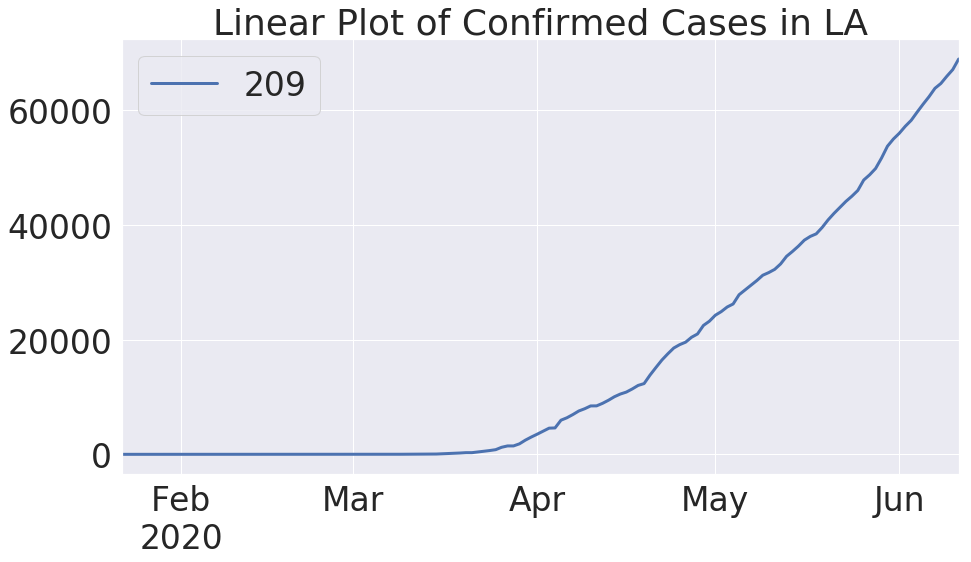

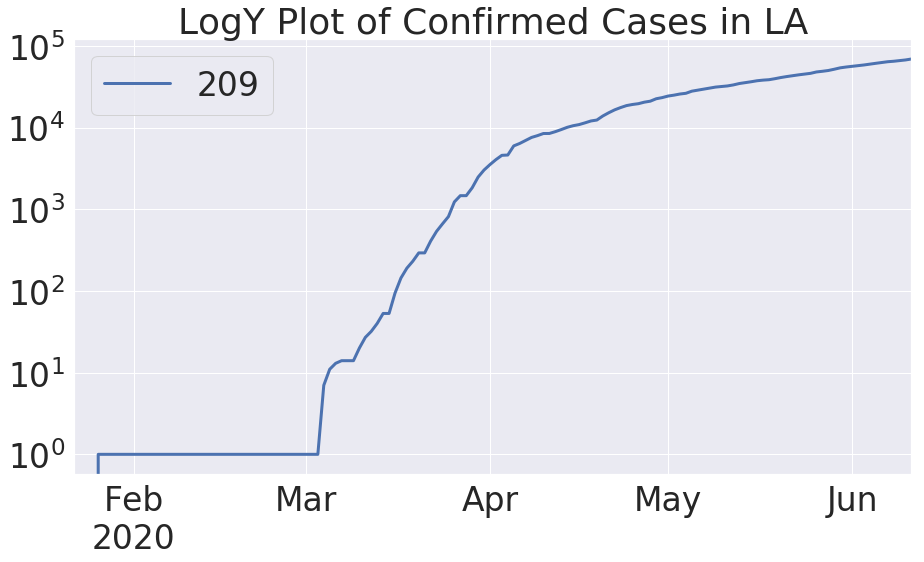

In [5]:
df_LA = df[df['Admin2']=='Los Angeles']
df_LA = df_LA.transpose()
df_LA = df_LA.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'])
df_LA.index = pd.to_datetime(df_LA.index)
df_LA.head()

fig1 = df_LA.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases in LA', kind='line')

fig2 = df_LA.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases in LA')

In [7]:
df_newcases_LA.tail()

,209
2020-06-06,1462
2020-06-07,846
2020-06-08,1255
2020-06-09,1166
2020-06-10,1848


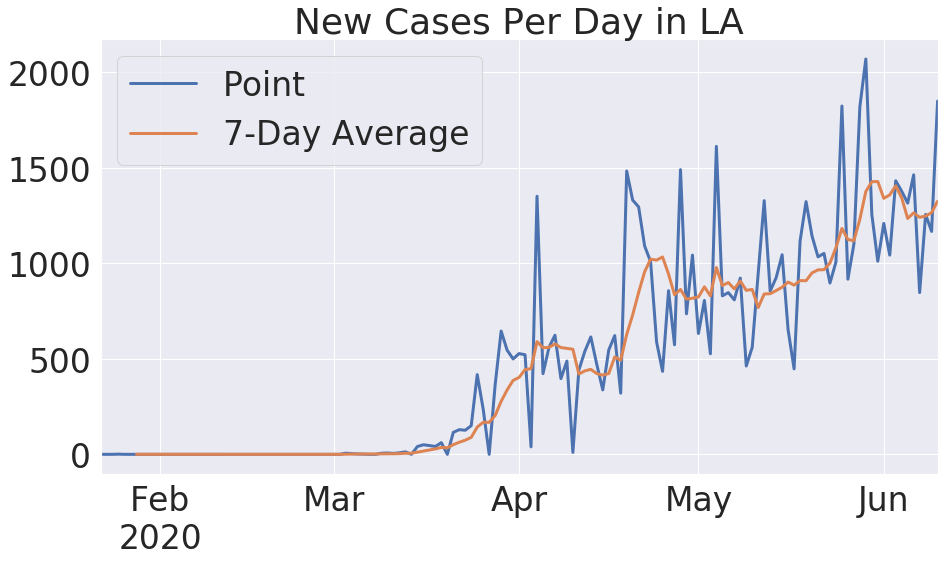

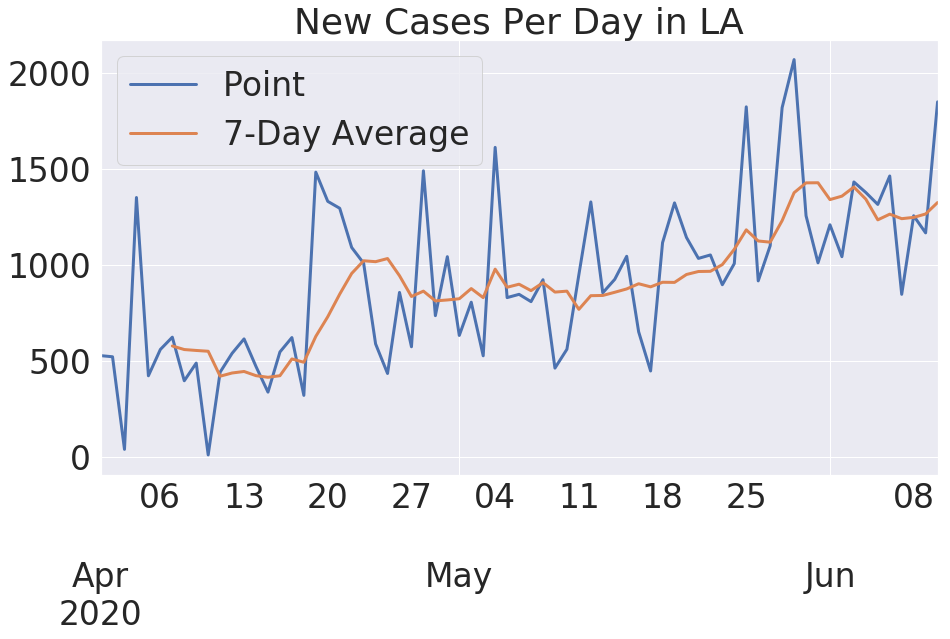

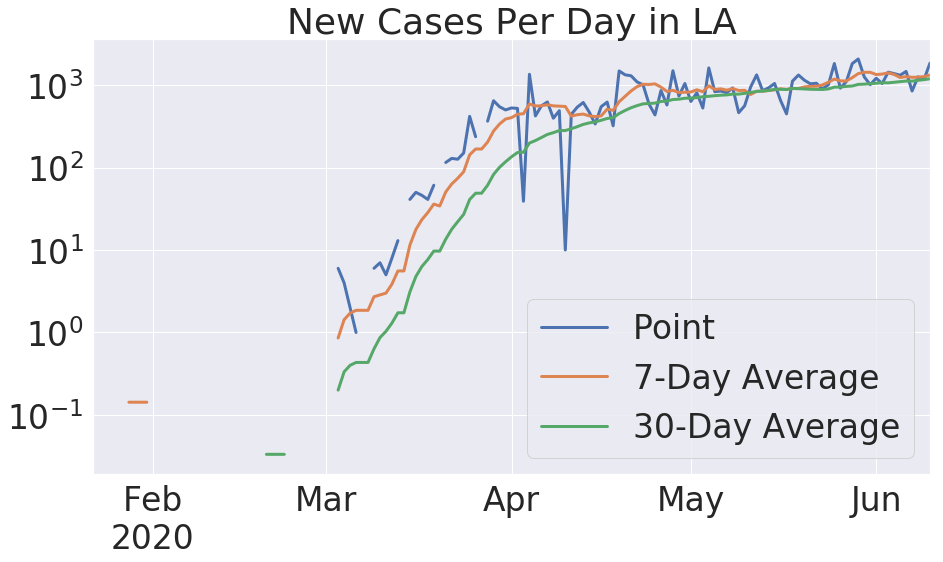

In [10]:
df_newcases_LA = df_LA[1:].values-df_LA[0:-1]
fig3 = df_newcases_LA.rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig3 = df_newcases_LA.rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig3)

fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rename(columns={209: 'Point'}).plot(kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig5 = df_newcases_LA[df_newcases_LA.index>pd.to_datetime('03-31-20')].rolling(window=7).mean().rename(columns={209: '7-Day Average'}).plot(ax=fig5)


# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_LA[ df_newcases_LA.values == 0 ].index
df_newcases_LA_tmp1 = df_newcases_LA.copy()
df_newcases_LA_tmp1.loc[indexVal] = np.NaN

df_newcases_LA_tmp2 = df_newcases_LA.rolling(window=7).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp2.values == 0 ].index
df_newcases_LA_tmp2.loc[indexVal] = np.NaN

df_newcases_LA_tmp3 = df_newcases_LA.rolling(window=30).mean()
indexVal = df_newcases_LA_tmp2[ df_newcases_LA_tmp3.values == 0 ].index
df_newcases_LA_tmp3.loc[indexVal] = np.NaN

fig4 = df_newcases_LA_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in LA')
fig4 = df_newcases_LA_tmp2.rename(columns={209: '7-Day Average'}).plot(logy=True, ax=fig4)
fig4 = df_newcases_LA_tmp3.rename(columns={209: '30-Day Average'}).plot(logy=True, ax=fig4)

## Exploratory Data Analysis by State

In [35]:
df_state = df.drop(labels=['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).groupby(['Province_State']).sum()
df_state = df_state.transpose()
df_state.index = pd.to_datetime(df_state.index)
df_state.tail()

Province_State,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,...,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2020-06-05,19387,523,0,24439,8651,125738,27601,43460,9773,49,...,25664,72548,11252,1027,71,48532,22993,2119,20249,933
2020-06-06,20043,535,0,25451,9101,128593,27834,43818,9845,49,...,26177,74470,11798,1046,71,49397,23442,2136,20571,939
2020-06-07,20500,543,0,26989,9426,130615,27987,43968,9942,49,...,26493,75408,12066,1063,71,50681,23729,2144,20835,947
2020-06-08,20925,562,0,27678,9740,133816,28169,44092,9972,49,...,27005,76463,12322,1075,71,51251,24041,2161,21038,960
2020-06-09,21422,572,0,28296,10080,136641,28333,44179,10020,49,...,27575,78208,12559,1084,71,51738,24354,2169,21308,970


In [61]:
col_drop = df_state.columns[df_state.values[-1][:] < 50_000]
df_state = df_state.drop(columns=col_drop, axis=1)

df_state.tail()

Province_State,California,Florida,Georgia,Illinois,Maryland,Massachusetts,Michigan,New Jersey,New York,Pennsylvania,Texas,Virginia
2020-06-05,125738,61488,50621,125915,56770,102557,63777,163336,376208,78815,72548,48532
2020-06-06,128593,62758,51359,126890,57482,103132,64229,163893,377316,79505,74470,49397
2020-06-07,130615,63938,51898,127757,57973,103436,64648,164164,378097,79908,75408,50681
2020-06-08,133816,64904,52497,128415,58404,103626,64944,164497,378799,80339,76463,51251
2020-06-09,136641,66000,53249,129212,58904,103889,64998,164796,379482,80870,78208,51738


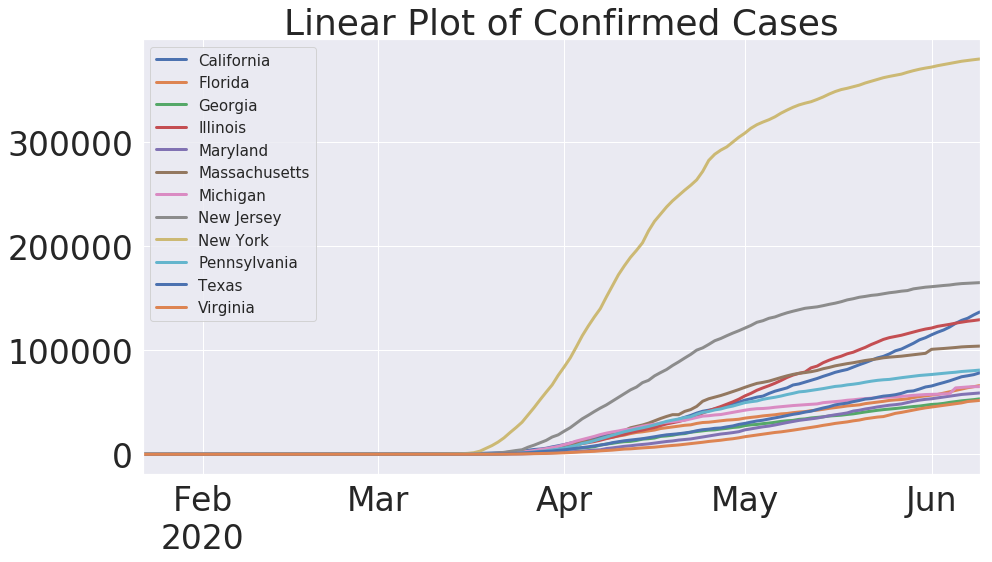

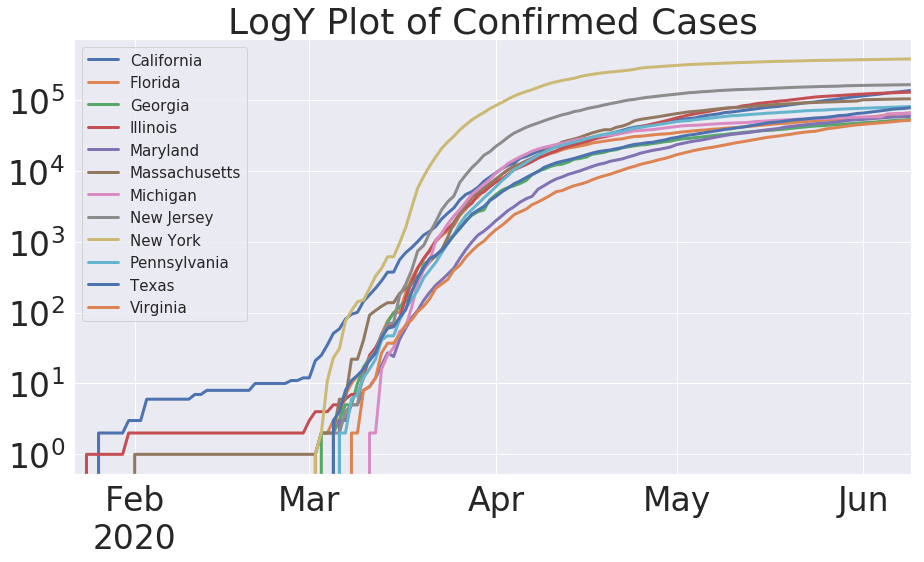

In [74]:
fig1 = df_state.plot(figsize=(15,8), title='Linear Plot of Confirmed Cases', kind='line')
plt.legend(fontsize=15);
fig2 = df_state.plot(figsize=(15,8), logy=True, title='LogY Plot of Confirmed Cases')
plt.legend(fontsize=15);

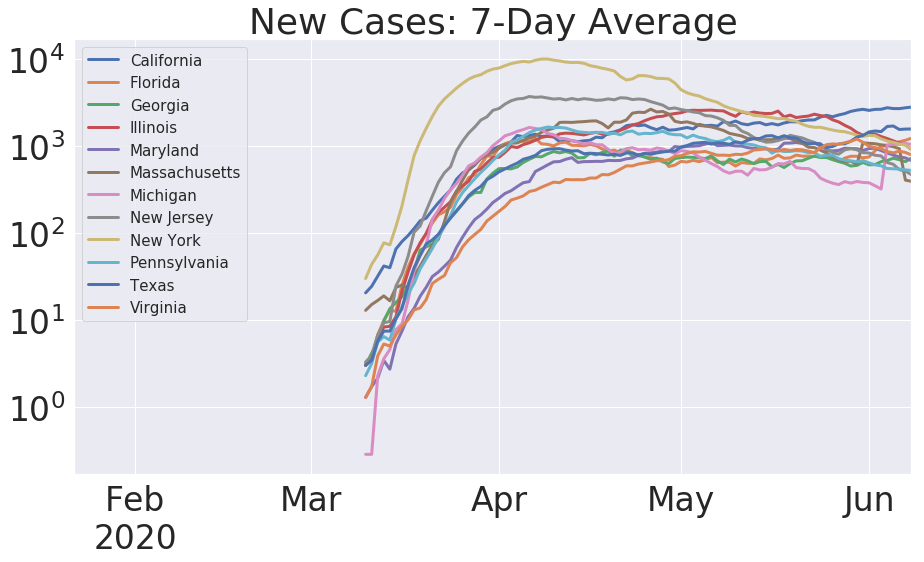

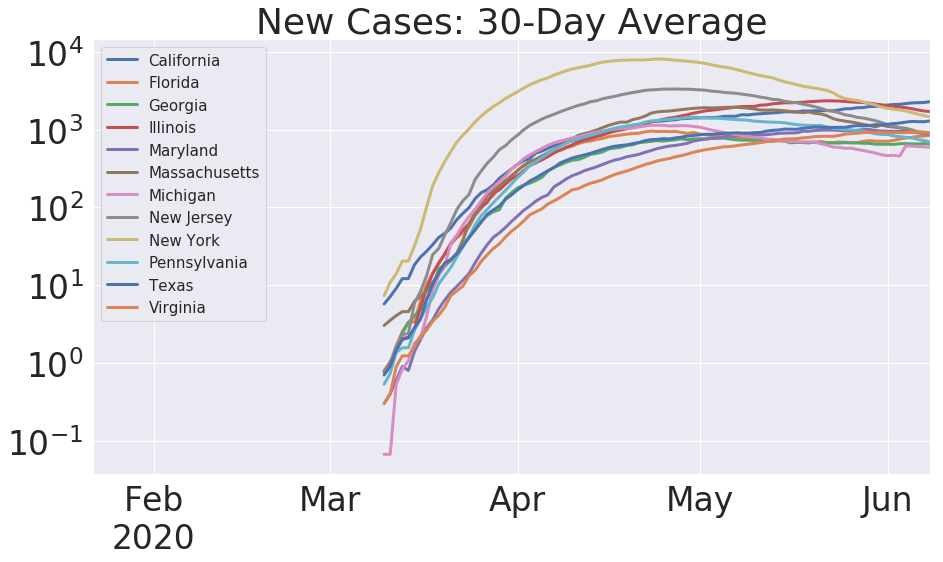

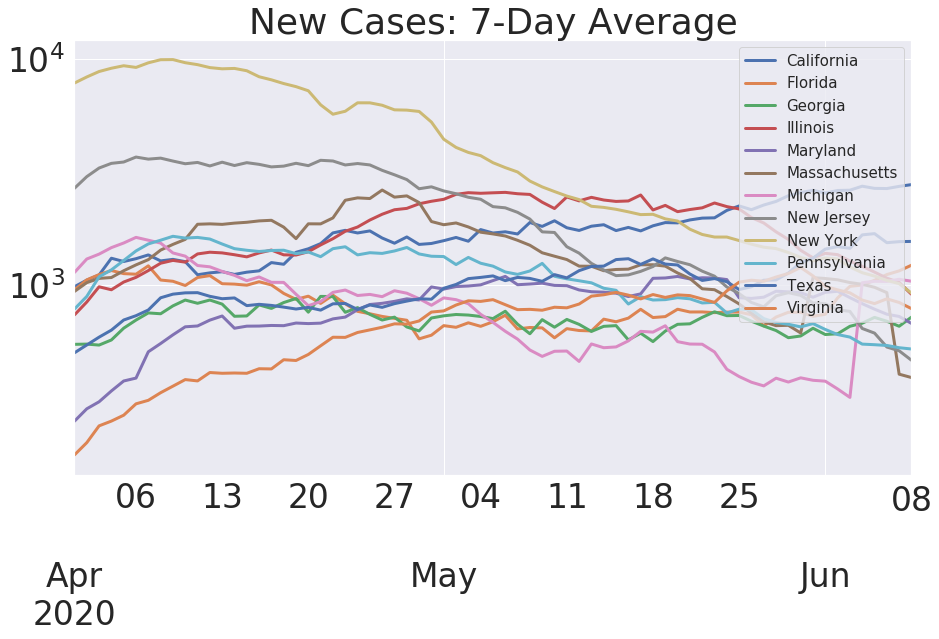

In [79]:
df_newcases_state = df_state[1:].values-df_state[0:-1]

# Drop the ones that have zeros to avoid problems in the log plot
indexVal = df_newcases_state[ df_newcases_state.values == 0 ].index
df_newcases_state_tmp1 = df_newcases_state.copy()
df_newcases_state_tmp1.loc[indexVal] = np.NaN

df_newcases_state_tmp2 = df_newcases_state.rolling(window=7).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp2.values == 0 ].index
df_newcases_state_tmp2.loc[indexVal] = np.NaN

df_newcases_state_tmp3 = df_newcases_state.rolling(window=30).mean()
indexVal = df_newcases_state_tmp2[ df_newcases_state_tmp3.values == 0 ].index
df_newcases_state_tmp3.loc[indexVal] = np.NaN

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2.plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);
fig5 = df_newcases_state_tmp3.plot(logy=True, figsize=(15,8), title='New Cases: 30-Day Average')
plt.legend(fontsize=15);

# fig4 = df_newcases_state_tmp1.rename(columns={209: 'Point'}).plot(logy=True, kind='line', figsize=(15,8), title='New Cases Per Day in state')
fig4 = df_newcases_state_tmp2[df_newcases_state_tmp2.index>pd.to_datetime('03-31-20')].plot(logy=True, figsize=(15,8), title='New Cases: 7-Day Average')
plt.legend(fontsize=15);